# Notebook to analyze data related to DMS cultures

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['svg.fonttype'] = 'none'

## Specify paths

In [2]:
culture_data = 'data/20220515_cultures.xlsx'
layout_path = 'data/20220505_layout.xlsx'
graph_outpath = 'manuscript_figures/'

## Import dataframe

In [3]:
df = pd.read_excel(culture_data, header=0)
df

,strain,id_number,t1_start,t1_end,t1_time (hh:mm:ss),cyto_dilution_factor_t1_start,cyto_well_t1_start,cells_per_uL_t1_start,cell_concentration_t1_start,OD_t1_end,...,t2_end,t2_time (hh:mm:ss),OD_t2_end,cyto_dilution_factor_t2_end,cyto_plate_t2_end,cyto_well_t2_end,cells_per_uL_t2_end,cell_concentration_t2_end,nb_gen_t2,total_nb_gen
0,BY4741,1,21-04-2022 10:53,NaN,06:30:00,30,A08,876.049699,2628.149098,1.5690,...,22-04-2022 00:08,04:38:00,1.04725,20.0,3,D01,723.356737,14467.134739,1.486193,4.053158
1,BY4741,2,21-04-2022 10:53,NaN,06:30:00,30,B07,822.474950,2467.424851,1.3950,...,22-04-2022 00:08,04:38:00,1.16425,20.0,3,E01,727.372906,14547.458127,1.459241,4.004256
2,BY4741,3,21-04-2022 10:53,21-04-2022 16:23,05:30:00,30,C07,849.389989,2548.169968,0.8810,...,22-04-2022 00:08,04:38:00,1.34175,20.0,3,F01,728.111114,14562.222282,1.437091,3.513478
3,BY4741,4,21-04-2022 10:53,NaN,07:30:00,30,A08,876.049699,2628.149098,0.8935,...,22-04-2022 01:30,05:00:00,1.34200,20.0,5,A10,1011.074808,20221.496158,1.591896,3.824977
4,BY4741,5,21-04-2022 10:53,NaN,07:30:00,30,B07,822.474950,2467.424851,1.0895,...,22-04-2022 01:30,05:00:00,1.04400,20.0,5,A11,826.022347,16520.446944,1.694577,3.884263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,R1158,116,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H08,1154.564593,3463.693778,1.1025,...,04-05-2022 10:00,08:00:00,1.38600,20.0,10-23-08am,B08,464.039330,9280.786602,1.707083,3.288196
212,R1158,117,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H09,1144.835910,3434.507730,1.3515,...,04-05-2022 10:00,08:00:00,1.37800,20.0,10-23-08am,B09,408.376413,8167.528256,1.553371,3.168878
213,R1158,118,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H07,1164.810153,3494.430460,0.8065,...,04-05-2022 12:40,10:40:00,1.35400,10.0,12-58-18pm,A10,639.485087,6394.850866,1.481122,2.906908
214,R1158,119,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H08,1154.564593,3463.693778,0.8065,...,04-05-2022 12:40,10:40:00,1.01600,10.0,12-58-18pm,A11,463.966290,4639.662901,1.188632,2.594891


## Convert timeframes to h

In [4]:
def convert_to_h(t):
    from datetime import datetime
    if pd.isna(t):
        return np.nan
    else:
        delta = datetime.strptime(str(t), '%H:%M:%S') - datetime.strptime('00:00:00', '%H:%M:%S')
        hour_delta = delta.total_seconds()/3600
        return round(hour_delta,2)

In [5]:
df['t1_time'] = df['t1_time (hh:mm:ss)'].apply(lambda x: convert_to_h(x))
df['t2_time'] = df['t2_time (hh:mm:ss)'].apply(lambda x: convert_to_h(x))
df['selection_time'] = df['t1_time'] + df['t2_time']
df

,strain,id_number,t1_start,t1_end,t1_time (hh:mm:ss),cyto_dilution_factor_t1_start,cyto_well_t1_start,cells_per_uL_t1_start,cell_concentration_t1_start,OD_t1_end,...,cyto_dilution_factor_t2_end,cyto_plate_t2_end,cyto_well_t2_end,cells_per_uL_t2_end,cell_concentration_t2_end,nb_gen_t2,total_nb_gen,t1_time,t2_time,selection_time
0,BY4741,1,21-04-2022 10:53,NaN,06:30:00,30,A08,876.049699,2628.149098,1.5690,...,20.0,3,D01,723.356737,14467.134739,1.486193,4.053158,6.5,4.63,11.13
1,BY4741,2,21-04-2022 10:53,NaN,06:30:00,30,B07,822.474950,2467.424851,1.3950,...,20.0,3,E01,727.372906,14547.458127,1.459241,4.004256,6.5,4.63,11.13
2,BY4741,3,21-04-2022 10:53,21-04-2022 16:23,05:30:00,30,C07,849.389989,2548.169968,0.8810,...,20.0,3,F01,728.111114,14562.222282,1.437091,3.513478,5.5,4.63,10.13
3,BY4741,4,21-04-2022 10:53,NaN,07:30:00,30,A08,876.049699,2628.149098,0.8935,...,20.0,5,A10,1011.074808,20221.496158,1.591896,3.824977,7.5,5.00,12.50
4,BY4741,5,21-04-2022 10:53,NaN,07:30:00,30,B07,822.474950,2467.424851,1.0895,...,20.0,5,A11,826.022347,16520.446944,1.694577,3.884263,7.5,5.00,12.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,R1158,116,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H08,1154.564593,3463.693778,1.1025,...,20.0,10-23-08am,B08,464.039330,9280.786602,1.707083,3.288196,9.0,8.00,17.00
212,R1158,117,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H09,1144.835910,3434.507730,1.3515,...,20.0,10-23-08am,B09,408.376413,8167.528256,1.553371,3.168878,9.0,8.00,17.00
213,R1158,118,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H07,1164.810153,3494.430460,0.8065,...,10.0,12-58-18pm,A10,639.485087,6394.850866,1.481122,2.906908,9.0,10.67,19.67
214,R1158,119,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H08,1154.564593,3463.693778,0.8065,...,10.0,12-58-18pm,A11,463.966290,4639.662901,1.188632,2.594891,9.0,10.67,19.67


## Calculate growth rate (nb_gen /h)

In [6]:
def calculate_growth_rate(nbgen, t):
    
    if pd.isna(nbgen) | pd.isna(t):
        return np.nan
    else:
        g = round(nbgen/t,2)
        return g

In [7]:
df['growth_rate_t1'] = df.apply(lambda row: calculate_growth_rate(row.nb_gen_t1, row.t1_time), axis=1)
df['growth_rate_t2'] = df.apply(lambda row: calculate_growth_rate(row.nb_gen_t2, row.t2_time), axis=1)
df

,strain,id_number,t1_start,t1_end,t1_time (hh:mm:ss),cyto_dilution_factor_t1_start,cyto_well_t1_start,cells_per_uL_t1_start,cell_concentration_t1_start,OD_t1_end,...,cyto_well_t2_end,cells_per_uL_t2_end,cell_concentration_t2_end,nb_gen_t2,total_nb_gen,t1_time,t2_time,selection_time,growth_rate_t1,growth_rate_t2
0,BY4741,1,21-04-2022 10:53,NaN,06:30:00,30,A08,876.049699,2628.149098,1.5690,...,D01,723.356737,14467.134739,1.486193,4.053158,6.5,4.63,11.13,0.39,0.32
1,BY4741,2,21-04-2022 10:53,NaN,06:30:00,30,B07,822.474950,2467.424851,1.3950,...,E01,727.372906,14547.458127,1.459241,4.004256,6.5,4.63,11.13,0.39,0.32
2,BY4741,3,21-04-2022 10:53,21-04-2022 16:23,05:30:00,30,C07,849.389989,2548.169968,0.8810,...,F01,728.111114,14562.222282,1.437091,3.513478,5.5,4.63,10.13,0.38,0.31
3,BY4741,4,21-04-2022 10:53,NaN,07:30:00,30,A08,876.049699,2628.149098,0.8935,...,A10,1011.074808,20221.496158,1.591896,3.824977,7.5,5.00,12.50,0.30,0.32
4,BY4741,5,21-04-2022 10:53,NaN,07:30:00,30,B07,822.474950,2467.424851,1.0895,...,A11,826.022347,16520.446944,1.694577,3.884263,7.5,5.00,12.50,0.29,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,R1158,116,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H08,1154.564593,3463.693778,1.1025,...,B08,464.039330,9280.786602,1.707083,3.288196,9.0,8.00,17.00,0.18,0.21
212,R1158,117,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H09,1144.835910,3434.507730,1.3515,...,B09,408.376413,8167.528256,1.553371,3.168878,9.0,8.00,17.00,0.18,0.19
213,R1158,118,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H07,1164.810153,3494.430460,0.8065,...,A10,639.485087,6394.850866,1.481122,2.906908,9.0,10.67,19.67,0.16,0.14
214,R1158,119,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H08,1154.564593,3463.693778,0.8065,...,A11,463.966290,4639.662901,1.188632,2.594891,9.0,10.67,19.67,0.16,0.11


## Import layout and annotate

In [8]:
layout = pd.read_excel(layout_path, header=0)
layout

,strain,id_number,locus,pool_type,pool_combination,compound,replicate,note
0,BY4741,1,FKS1-HS1,single_ortho,1+4,none,1,t0 lost
1,BY4741,2,FKS1-HS1,single_ortho,2+5,none,2,NaN
2,BY4741,3,FKS1-HS1,single_ortho,3+6,none,3,NaN
3,BY4741,4,FKS1-HS1,single_ortho,1+4,caspofungin,1,t0 lost
4,BY4741,5,FKS1-HS1,single_ortho,2+5,caspofungin,2,NaN
...,...,...,...,...,...,...,...,...
211,R1158,116,FKS2-HS2,double,44+47,micafungin,2,NaN
212,R1158,117,FKS2-HS2,double,45+48,micafungin,3,NaN
213,R1158,118,FKS2-HS2,double,43+46,anidulafungin,1,no pellet
214,R1158,119,FKS2-HS2,double,44+47,anidulafungin,2,no pellet


In [9]:
layout['pool_type'] = layout['pool_type'].apply(lambda x: x.split('_')[0] if x=='single_ortho' else x)
layout.head(1)

,strain,id_number,locus,pool_type,pool_combination,compound,replicate,note
0,BY4741,1,FKS1-HS1,single,1+4,none,1,t0 lost


In [10]:
fulldf = df.merge(right=layout, on=['strain','id_number'])
fulldf

,strain,id_number,t1_start,t1_end,t1_time (hh:mm:ss),cyto_dilution_factor_t1_start,cyto_well_t1_start,cells_per_uL_t1_start,cell_concentration_t1_start,OD_t1_end,...,t2_time,selection_time,growth_rate_t1,growth_rate_t2,locus,pool_type,pool_combination,compound,replicate,note
0,BY4741,1,21-04-2022 10:53,NaN,06:30:00,30,A08,876.049699,2628.149098,1.5690,...,4.63,11.13,0.39,0.32,FKS1-HS1,single,1+4,none,1,t0 lost
1,BY4741,2,21-04-2022 10:53,NaN,06:30:00,30,B07,822.474950,2467.424851,1.3950,...,4.63,11.13,0.39,0.32,FKS1-HS1,single,2+5,none,2,NaN
2,BY4741,3,21-04-2022 10:53,21-04-2022 16:23,05:30:00,30,C07,849.389989,2548.169968,0.8810,...,4.63,10.13,0.38,0.31,FKS1-HS1,single,3+6,none,3,NaN
3,BY4741,4,21-04-2022 10:53,NaN,07:30:00,30,A08,876.049699,2628.149098,0.8935,...,5.00,12.50,0.30,0.32,FKS1-HS1,single,1+4,caspofungin,1,t0 lost
4,BY4741,5,21-04-2022 10:53,NaN,07:30:00,30,B07,822.474950,2467.424851,1.0895,...,5.00,12.50,0.29,0.34,FKS1-HS1,single,2+5,caspofungin,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,R1158,116,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H08,1154.564593,3463.693778,1.1025,...,8.00,17.00,0.18,0.21,FKS2-HS2,double,44+47,micafungin,2,NaN
212,R1158,117,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H09,1144.835910,3434.507730,1.3515,...,8.00,17.00,0.18,0.19,FKS2-HS2,double,45+48,micafungin,3,NaN
213,R1158,118,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H07,1164.810153,3494.430460,0.8065,...,10.67,19.67,0.16,0.14,FKS2-HS2,double,43+46,anidulafungin,1,no pellet
214,R1158,119,03-05-2022 11:01,04-05-2022 01:40,09:00:00,30,H08,1154.564593,3463.693778,0.8065,...,10.67,19.67,0.16,0.11,FKS2-HS2,double,44+47,anidulafungin,2,no pellet


In [11]:
fulldf[['strain','id_number','pool_type','locus','compound','replicate','total_nb_gen','selection_time']].to_excel('data/nbgen.xlsx')

In [12]:
fulldf[(fulldf.strain=='BY4741') & (fulldf.id_number.isin([2,5,8,11]))]

,strain,id_number,t1_start,t1_end,t1_time (hh:mm:ss),cyto_dilution_factor_t1_start,cyto_well_t1_start,cells_per_uL_t1_start,cell_concentration_t1_start,OD_t1_end,...,t2_time,selection_time,growth_rate_t1,growth_rate_t2,locus,pool_type,pool_combination,compound,replicate,note
1,BY4741,2,21-04-2022 10:53,NaN,06:30:00,30,B07,822.47495,2467.424851,1.3950,...,4.63,11.13,0.39,0.32,FKS1-HS1,single,2+5,none,2,NaN
4,BY4741,5,21-04-2022 10:53,NaN,07:30:00,30,B07,822.47495,2467.424851,1.0895,...,5.00,12.50,0.29,0.34,FKS1-HS1,single,2+5,caspofungin,2,NaN
7,BY4741,8,21-04-2022 10:53,NaN,07:30:00,30,B07,822.47495,2467.424851,0.8475,...,5.00,12.50,0.25,0.32,FKS1-HS1,single,2+5,micafungin,2,NaN
10,BY4741,11,21-04-2022 10:53,NaN,07:30:00,30,B07,822.47495,2467.424851,0.8055,...,5.00,12.50,0.27,0.28,FKS1-HS1,single,2+5,anidulafungin,2,NaN


## Pivot

In [13]:
lcols = ['pool_type','strain','locus','compound','replicate','total_nb_gen']
longOD = fulldf.melt(id_vars=lcols, value_vars=['OD_t1_end','OD_t2_end'], var_name='timepoint', value_name='OD')
longOD['timepoint'] = longOD['timepoint'].str[-6:-4]
longcyto = fulldf.melt(id_vars=lcols, value_vars=['cell_concentration_t1_end','cell_concentration_t2_end'], var_name='timepoint', value_name='cyto')
longcyto['timepoint'] = longcyto['timepoint'].str[-6:-4]
longgen = fulldf.melt(id_vars=lcols, value_vars=['nb_gen_t1','nb_gen_t2'], var_name='timepoint', value_name='nbgen')
corr = longOD.sort_values(by=lcols)
corr['cyto'] = longcyto.sort_values(by=lcols)[['cyto']]/1000
corr['nbgen'] = longgen.sort_values(by=lcols)[['nbgen']]
corr

,pool_type,strain,locus,compound,replicate,total_nb_gen,timepoint,OD,cyto,nbgen
21,double,BY4741,FKS1-HS1,anidulafungin,1,3.580377,t1,1.38250,26.011035,2.255316
237,double,BY4741,FKS1-HS1,anidulafungin,1,3.580377,t2,0.88150,10.618190,1.325061
22,double,BY4741,FKS1-HS1,anidulafungin,2,3.811532,t1,1.38250,27.139256,2.338957
238,double,BY4741,FKS1-HS1,anidulafungin,2,3.811532,t2,0.90700,12.839720,1.472576
23,double,BY4741,FKS1-HS1,anidulafungin,3,3.738078,t1,1.39550,28.001531,2.381780
...,...,...,...,...,...,...,...,...,...,...
402,single,R1158,FKS2-HS2,none,1,4.564386,t2,2.11475,32.657641,2.156627
187,single,R1158,FKS2-HS2,none,2,4.536025,t1,1.24000,38.616978,2.491456
403,single,R1158,FKS2-HS2,none,2,4.536025,t2,2.01275,29.834805,2.044569
188,single,R1158,FKS2-HS2,none,3,4.683999,t1,1.13900,35.965735,2.470903


## Plot

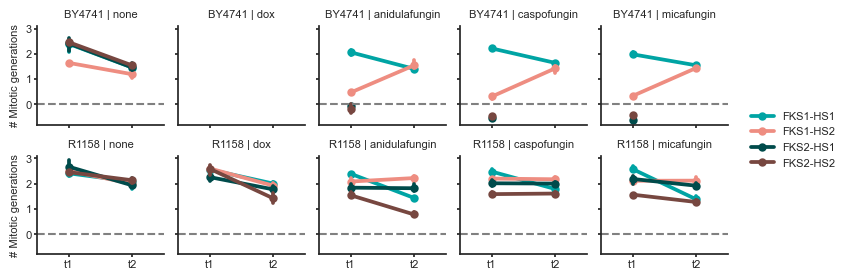

In [14]:
sns.set(rc = {
              'font.family':'Arial',
              'font.size':8,
              'legend.title_fontsize':8, 'legend.fontsize':8,
              'axes.labelsize':8,'axes.titlesize':8,
              'xtick.labelsize':8, 'ytick.labelsize':8,
              'xtick.major.pad':2, 'ytick.major.pad':2,
              'xtick.bottom': True, 'ytick.left': True,
              'xtick.major.size':2, 'ytick.major.size':2,
             },
       style='ticks')

g = sns.catplot(corr[corr.pool_type == 'single'],
                row='strain', col='compound', col_order=['none','dox','anidulafungin','caspofungin','micafungin'],
                x='timepoint', y='nbgen', errorbar=('pi',100),
                hue='locus', palette=['#00A4A4','#EE8D81','#004B4B','#774740'],
                kind='point', markersize=4, height=1.5
               )
g.map(plt.axhline, y=0, ls='--', c='grey')
g.set_axis_labels('','# Mitotic generations')
g.set_titles(col_template='{col_name}', row_template='{row_name}')
g._legend.set_title(None)

plt.savefig(f'{graph_outpath}/nb_gens.svg', format='svg', dpi=300)

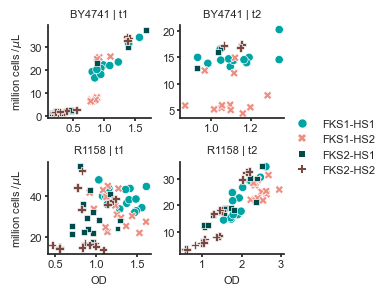

In [18]:
sns.set(rc = {
              'font.family':'Arial',
              'font.size':8,
              'legend.title_fontsize':8, 'legend.fontsize':8,
              'axes.labelsize':8,'axes.titlesize':8,
              'xtick.labelsize':8, 'ytick.labelsize':8,
              'xtick.major.pad':2, 'ytick.major.pad':2,
              'xtick.bottom': True, 'ytick.left': True,
              'xtick.major.size':2, 'ytick.major.size':2,
             },
       style='ticks')

g = sns.relplot(corr[corr.pool_type == 'single'],
                row='strain', col='timepoint',
                x='OD', y='cyto',
                hue='locus', palette=['#00A4A4','#EE8D81','#004B4B','#774740'],
                style='locus',
                height=1.5, facet_kws={'sharex':False, 'sharey':False}
               )

g.set_axis_labels('OD', r'million cells /$\mu$L')
g.set_titles(col_template='{col_name}', row_template='{row_name}')
g._legend.set_title(None)

plt.savefig(f'{graph_outpath}/corr_cyto.svg', format='svg', dpi=300)